# Lecture 11 - Feature Generation continued & K-Nearest Neighbors

# Feature Generation

## Global and Local Features

Features are the information extracted from images in terms of numerical values that are difficult to understand and correlate by human. Suppose we consider the image as data the information extracted from the data is known as features. Generally, features extracted from an image are of much more lower dimension than the original image. The reduction in dimentionality reduces the overheads of processing the bunch of images.

Basically there are two types of features are extracted from the images based on the application. They are **local features** and **global features**. Features are sometimes referred to as descriptors. *Global descriptors* are generally used in image retrieval, object detection and classification, while the *local descriptors* are used for object recognition/identification. There is a large difference between detection and identification. *Detection* is finding the existence of something/object (finding whether an object is exist in image/video) where as *recognition* is finding the identity (recognizing a person/object) of an object.

Global features describe the image as a whole to the generalize the entire object where as the local features describe the image patches (key points in the image) of an object. Global features include contour representations, shape descriptors, and texture features and local features represents the texture in an image patch. Shape Matrices, Invariant Moments (Hu, Zerinke), Histogram Oriented Gradients (HOG) and Co-HOG are some examples of global descriptors. SIFT, DAISY, SURF, LBP, BRISK, MSER and FREAK are some examples of local descriptors.

Generally, for low level applications such as object detection and classification, global features are used and for higher level applications such as object recognition, local features are used. Combination of global and local features improves the accuracy of the recognition with the side-effect of computational overheads.

We will introduce only a handful of them.
* If you are interested in learning more, consider taking the course EEL 6512 "Digital Image Processing and Computer Vision"
* ```scikit-image``` also offers ready-to-use feature generators. Find more here: https://scikit-image.org/docs/stable/api/skimage.feature.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from skimage.io import imread, imshow

In [3]:
Im1 = imread('images/one.jpg',as_gray=True)
Im2 = imread('images/two.jpg',as_gray=True)

In [4]:
Im1.shape, Im2.shape

((400, 300), (400, 300))

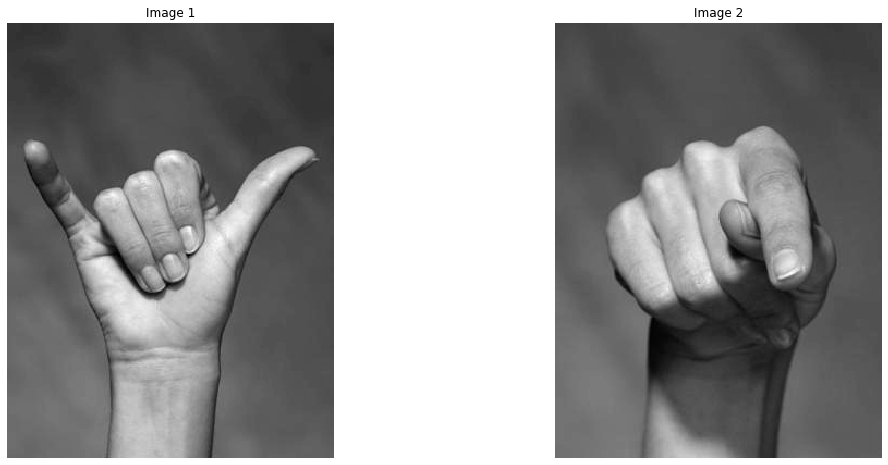

In [5]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(18)
ax1 = fig.add_subplot(121)
ax1.imshow(Im1, cmap='gray')
ax1.title.set_text('Image 1')
ax1.axis('off')
ax2 = fig.add_subplot(122)
ax2.imshow(Im2, cmap='gray')
ax2.title.set_text('Image 2')
ax2.axis('off');

Before moving on to the actual features, first lets define a function that will help us describe regions of the images so that we won't have enormous features when it is not needed.

This function will split the image up into regions and compute a user provided function on each of the divided regions of the image.

In [6]:
def windowedFeatures(img, numblockx, numblocky, func):
    H, W = np.shape(img)
    Wblocks = np.linspace(0, W, numblockx+1, dtype=int)
    Hblocks = np.linspace(0, H, numblocky+1, dtype=int)
    
    feat = np.zeros(numblockx * numblocky)
    for ii in range(len(Wblocks)-1):
        for jj in range(len(Hblocks)-1):
            featInd = ii * (numblockx) + jj
            feat[featInd] = func(img[Hblocks[jj]:Hblocks[jj+1],Wblocks[ii]:Wblocks[ii+1]].flatten())
    
    return feat

def eucDist(x,y):
    return np.sqrt(np.sum((x-y)**2))

def normFeat(x):
    return x / np.sqrt(x @ x.T)

## Global Features

Let's take a look at a few global features:

* **Histogram of Regional Means**: computes regional means in small patches within the image and then creates a histogram of means.

* **Histogram of Regional Variances**: computes regional variance of intensity pixel values and then creates a histogram of variances.

* **Histogram of Oriented Gradients (HOG):** computes local grdients in an image and then creates a histogram of gradients.

* **Shape Index:** The shape index, as defined by Koenderink & van Doorn, is a single valued measure of local curvature, assuming the image as a 3D plane with intensities representing heights.

* and many more...

### Regional Mean

(25,) (25,)


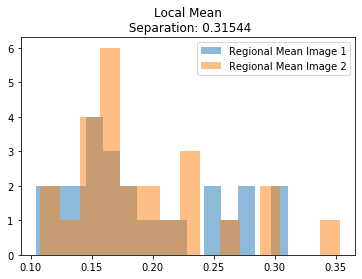

In [7]:
mean1 = windowedFeatures(Im1, 5, 5, np.mean)
mean2 = windowedFeatures(Im2, 5, 5, np.mean)

#normalize the features
mean1 = normFeat(mean1)
mean2 = normFeat(mean2)

plt.hist(mean1,bins=15,alpha=0.5,label='Regional Mean Image 1')
plt.hist(mean2,bins=15,alpha=0.5,label='Regional Mean Image 2')
plt.title('Local Mean\n Separation: %.5f' % (eucDist(mean1,mean2)))
plt.legend();

print(mean1.shape, mean2.shape)

### Regional Variance

(25,) (25,)


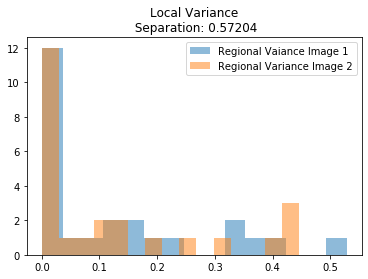

In [8]:
var1 = windowedFeatures(Im1, 5, 5, np.var)
var2 = windowedFeatures(Im2, 5, 5, np.var)

#normalize the features
var1 = normFeat(var1)
var2 = normFeat(var2)

plt.hist(var1,bins=15,alpha=0.5,label='Regional Vaiance Image 1')
plt.hist(var2,bins=15,alpha=0.5,label='Regional Variance Image 2')
plt.title('Local Variance\n Separation: %.5f' % (eucDist(var1,var2)))
plt.legend();

print(var1.shape, var2.shape)

### Histogram of Oriented Gradients (HOG)

In [19]:
from skimage.feature import hog

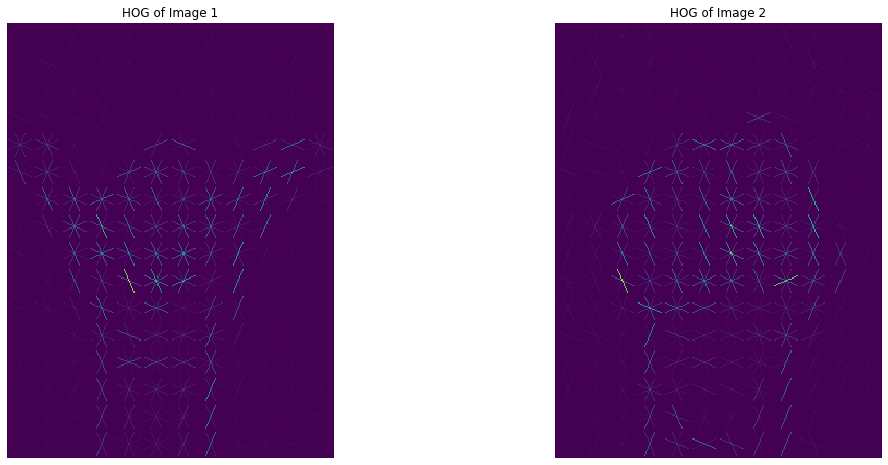

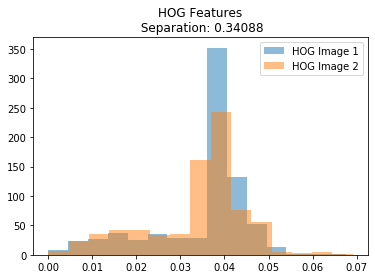

In [36]:
# Parameters for gradient features
N_orientations = 4      # Number of directional gradients to compute
Cell_Size = (25, 25)  # Size of window to compute gradient 
NBlocks = (1,1)         # Number of blocks

gradient1, visual = hog(Im1, orientations=N_orientations, pixels_per_cell=Cell_Size, cells_per_block=NBlocks,visualize=True)
gradient2, visual2 = hog(Im2, orientations=N_orientations, pixels_per_cell=Cell_Size, cells_per_block=NBlocks, visualize=True)

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(18)
ax1 = fig.add_subplot(121)
ax1.imshow(visual)
ax1.title.set_text('HOG of Image 1')
ax1.axis('off')
ax2 = fig.add_subplot(122)
ax2.imshow(visual2)
ax2.title.set_text('HOG of Image 2')
ax2.axis('off');

#normalize the features
gradient1 = normFeat(gradient1)
gradient2 = normFeat(gradient2)

plt.figure()
plt.hist(gradient1, bins=15, alpha=0.5, label='HOG Image 1')
plt.hist(gradient2, bins=15, alpha=0.5, label='HOG Image 2')
plt.title('HOG Features\n Separation: %.5f' % (eucDist(gradient1,gradient2)))
plt.legend();

### Shape Index

https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.shape_index

In [11]:
from skimage.feature import shape_index

(400, 300) (400, 300)


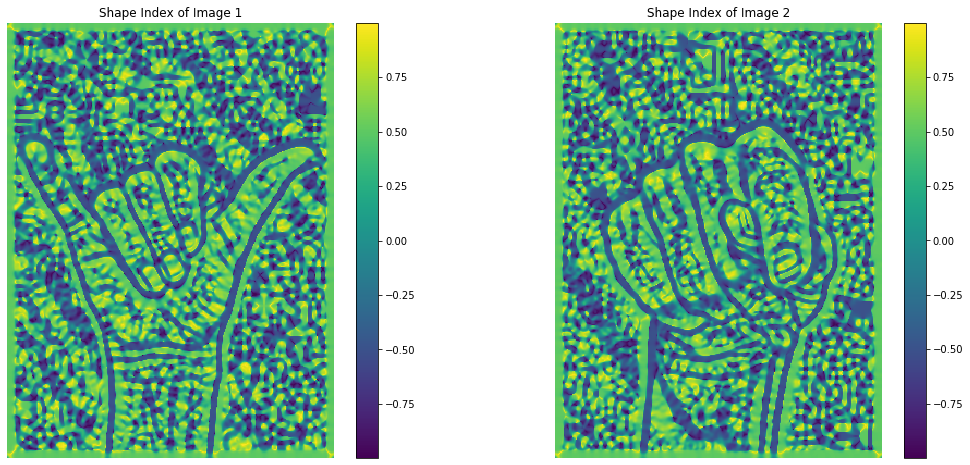

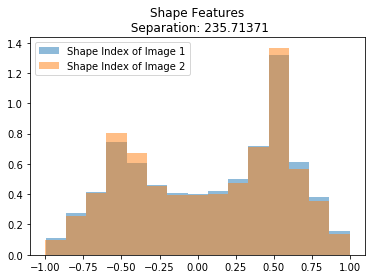

In [12]:
# Shape feature parameters
Sigma = 2  # Determines Standard deviation used for the Gaussian kernel,
# which is used for smoothing the input data before Hessian eigen value calculation.

shape1 = shape_index(Im1, sigma=Sigma)
shape2 = shape_index(Im2, sigma=Sigma)

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(18)
ax1 = fig.add_subplot(121)
pos=ax1.imshow(shape1)
fig.colorbar(pos, ax=ax1)
ax1.title.set_text('Shape Index of Image 1')
ax1.axis('off')
ax2 = fig.add_subplot(122)
pos=ax2.imshow(shape2)
fig.colorbar(pos, ax=ax2)
ax2.title.set_text('Shape Index of Image 2')
ax2.axis('off');

print(shape1.shape, shape2.shape)

plt.figure()
plt.hist(shape1.flatten(), bins=15, alpha=0.5, density=True, label='Shape Index of Image 1')
plt.hist(shape2.flatten(), bins=15, alpha=0.5, density=True, label='Shape Index of Image 2')
plt.title('Shape Features\n Separation: %.5f' % (eucDist(shape1,shape2)))
plt.legend();

(25,) (25,)


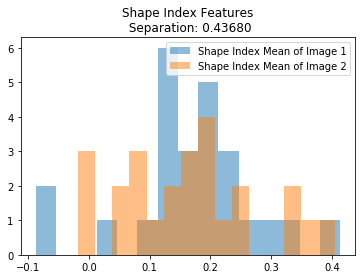

In [13]:
shape1 = windowedFeatures(shape1, 5, 5, np.mean)
shape2 = windowedFeatures(shape2, 5, 5, np.mean)

#normalize the features
shape1 = normFeat(shape1)
shape2 = normFeat(shape2)

plt.figure()
plt.hist(shape1, bins=15, alpha=0.5, label='Shape Index Mean of Image 1')
plt.hist(shape2, bins=15, alpha=0.5, label='Shape Index Mean of Image 2')
plt.title('Shape Index Features\n Separation: %.5f' % (eucDist(shape1,shape2)))
plt.legend();

print(shape1.shape, shape2.shape)

## Local Features

* **Local Binary Patterns (LBP):** LBP looks at points surrounding a central point and tests whether the surrounding points are greater than or less than the central point (i.e. gives a binary result).

* and many more...

### Local Binary Patterns

https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.local_binary_pattern

In [14]:
from skimage.feature import local_binary_pattern

(400, 300) (400, 300)


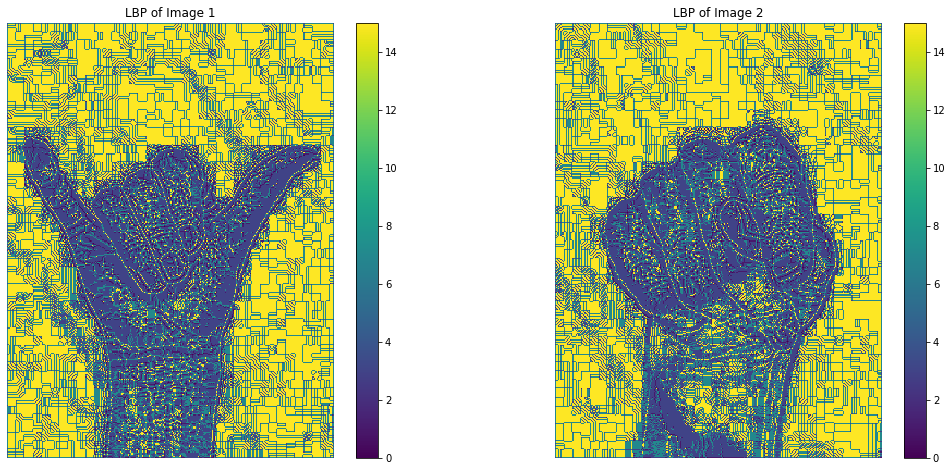

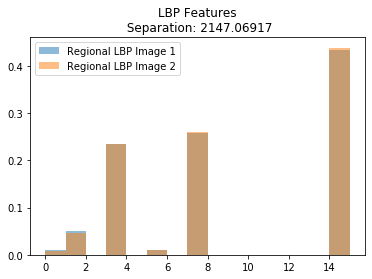

In [15]:
# Local Binary Pattern parameters
numPoints = 4
radius = 1
lbp1 = local_binary_pattern(Im1, numPoints, radius, method='ror')
lbp2 = local_binary_pattern(Im2, numPoints, radius, method='ror')

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(18)
ax1 = fig.add_subplot(121)
pos=ax1.imshow(lbp1)
fig.colorbar(pos, ax=ax1)
ax1.title.set_text('LBP of Image 1')
ax1.axis('off')
ax2 = fig.add_subplot(122)
pos=ax2.imshow(lbp2)
fig.colorbar(pos, ax=ax2)
ax2.title.set_text('LBP of Image 2')
ax2.axis('off');

print(lbp1.shape, lbp2.shape)

plt.figure()
plt.hist(lbp1.flatten(), bins=15, alpha=0.5, density = True, label='Regional LBP Image 1')
plt.hist(lbp2.flatten(), bins=15, alpha=0.5, density = True, label='Regional LBP Image 2')
plt.title('LBP Features\n Separation: %.5f' % (eucDist(lbp1,lbp2)))
plt.legend();

(25,) (25,)


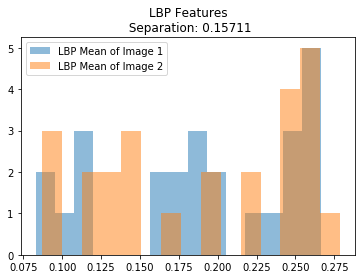

In [16]:
lbp1 = windowedFeatures(lbp1, 5, 5, np.mean)
lbp2 = windowedFeatures(lbp2, 5, 5, np.mean)

#normalize the features
lbp1 = normFeat(lbp1)
lbp2 = normFeat(lbp2)

plt.figure()
plt.hist(lbp1, bins=15, alpha=0.5, label='LBP Mean of Image 1')
plt.hist(lbp2, bins=15, alpha=0.5, label='LBP Mean of Image 2')
plt.title('LBP Features\n Separation: %.5f' % (eucDist(lbp1,lbp2)))
plt.legend();

print(lbp1.shape, lbp2.shape)

# Linear Classifiers

There are *many* classifiers in the machine learning literture. We will cover a few in this class. 

* There are two approaches for classification: **discriminative** and **generative**.

A **discriminative** approach for classification is one in which we partition the feature space into regions for each class. Then, when we have a test point, we evaluate in which region it landed on and classify it accordingly.

A **generative** approach for classification is one in which we estimate the parameters for distributions (typically probability distributions) that generate the data for each class. Then, when we have a test point, we can compute the posterior probability of that point belonging to each class and assign the point to the class with the highest posterior probability.

* **Non-parametric methods** are those that do not assume a particular generating distribution for the data. 

* The **K-nearest nerighbors (K-NN)** algorithm is one example of a non-parametric generative classifier.

# K-Nearest Neighbors Classifier

Nearest neighbors methods compare a test point to the $k$ nearest training data points and then estimate an output value based on the desired/true output values of the $k$ nearest training points.

* Essentially, there is no "training" other than storing the training data points and their desired outputs

* In test, you need to: 
    1. Determine which $k$ neighbors in the training data are closest to the test point; and,
    2. Determine the output value for the test point.
    
In order to find the $k$ *nearest neighbors* in the training data, you need to define a **similarity measure** or a **dissimilarity measure**. The most common dissimilarity measure is Euclidean distrance:

* Euclidean distance: $d_E(\mathbf{x}_1, \mathbf{x}_2) = \sqrt{(\mathbf{x}_1 - \mathbf{x}_2)^T(\mathbf{x}_1 - \mathbf{x}_2)}$

* City-block distance: $d_{CB}(\mathbf{x}_1,\mathbf{x}_2) = \sum_{i=1}^n |\mathbf{x}_{1i} - \mathbf{x}_{2i}|$

* Mahalanobis distance: $d_M(\mathbf{x}_1, \mathbf{x}_2) = \sqrt{(\mathbf{x}_1 - \mathbf{x}_2)^T\Sigma^{-1}(\mathbf{x}_1 - \mathbf{x}_2)}$

* Cosine angle similarity: $\cos(\theta) = \frac{\mathbf{x}_1^T \mathbf{x}_2}{\Vert\mathbf{x}_1\Vert_2^2 \Vert\mathbf{x}_2\Vert_2^2}$

* and many more.

Many other distance metrics are available in ```scikit-learn```. They are listed at http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html.

If you are doing classification, once you find the $k$ nearest neighbors to your test point in the training data, then you can determine the class label of your test point using (most commonly) **majority vote**.

* If there are ties, they can be broken randomly or using schemes like applying the label to the closest data point in the neighborhood.

In [17]:
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix

import seaborn as sns

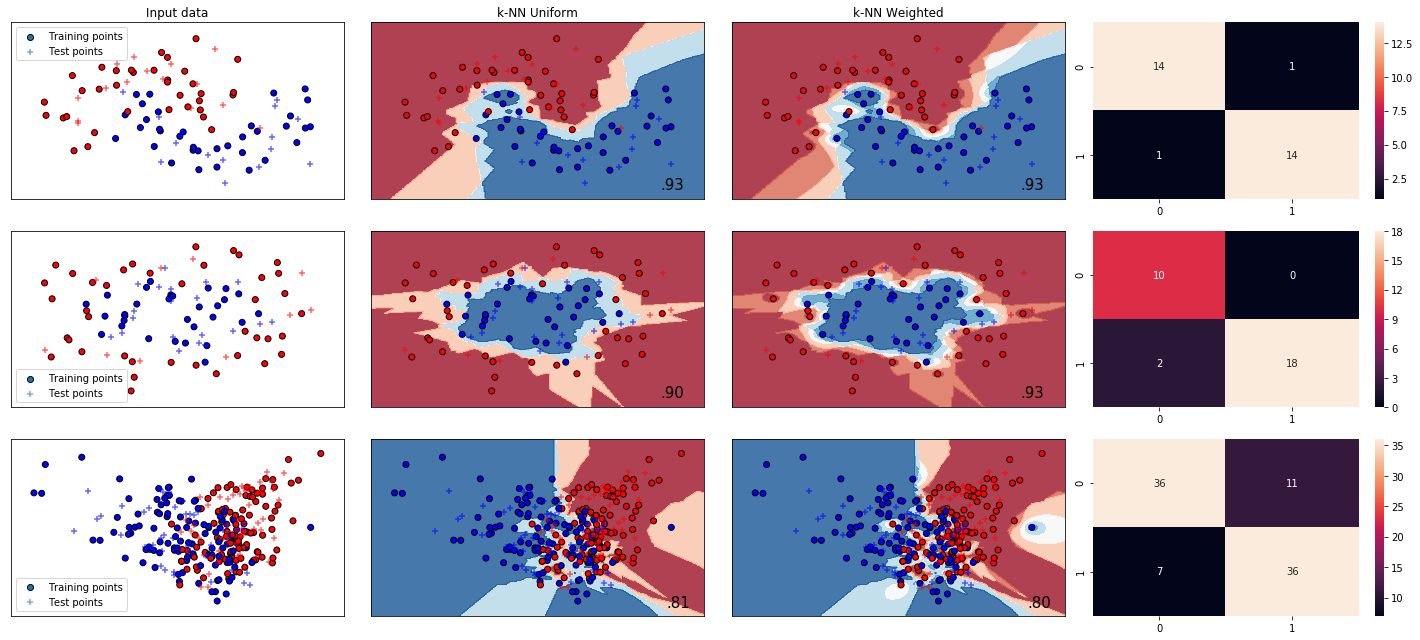

In [18]:
# Source: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

# figure parameters
h = .02  # step size in the mesh
figure = plt.figure(figsize=(20, 9))

# set up classifiers
n_neighbors = 3
classifiers = [KNeighborsClassifier(n_neighbors, weights='uniform'), \
               KNeighborsClassifier(n_neighbors, weights='distance')]
names = ["k-NN Uniform", "k-NN Weighted"]

# Put together Data Sets
n_samples = 300
X, y = make_classification(n_samples, n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.3, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k',label='Training points')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], marker='+', c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k',label='Test points')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend()
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
        clf.fit(X_train, y_train)
        y_predict = clf.predict(X_test)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], marker='+', c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        
        i += 1
    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_predict)
    C = confusion_matrix(y_test, y_predict)
    fig = plt.subplot(len(datasets), len(classifiers) + 2, i)
    sns.heatmap(C,annot=True)
    
    
#     fig.plot(fpr,tpr)
#     plt.xlabel('FPR')
#     plt.ylabel('TPR')
#     plt.title(auc(fpr, tpr))
    i += 1
        
    

plt.tight_layout()
plt.show()